<a href="https://colab.research.google.com/github/vikasmeena23/Github-demo/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Artificial Neural Network (ANN) model

In [ ]:
%pip install tensorflow
%pip install tabulate
%pip install networkx



In [ ]:
# Install TensorFlow (uncomment if running in a notebook environment)
# %pip install tensorflow

import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam

# Load the Telco Customer Churn dataset
# Update the filename if CSV file has a different name or path
customer_data = pd.read_csv("Telco-Customer-Churn_81cbbb67-9878-4527-a7ab-c2b2c833d4a8.csv")

# Display the first few rows to inspect the data structure
customer_data.head()


In [ ]:
# Remove the 'customerID' column as it is just an identifier and not useful for modeling
customer_data.drop(columns=['customerID'], inplace=True)

# Convert the 'TotalCharges' column to numeric, coercing errors to NaN (e.g., empty strings)
customer_data['TotalCharges'] = pd.to_numeric(customer_data['TotalCharges'], errors='coerce')

# Drop any rows with missing values (NaN) from the dataset
customer_data.dropna(inplace=True)

# Display the first few rows to verify changes
customer_data.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
customer_data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
# Check if 'customer_data' is already loaded; if not, load the dataset
if 'customer_data' not in locals():
    import pandas as pd
    customer_data = pd.read_csv("Telco-Customer-Churn_81cbbb67-9878-4527-a7ab-c2b2c833d4a8.csv")  # Update filename if needed

# Convert the 'Churn' column to binary: 1 for 'Yes', 0 for 'No'
customer_data['Churn'] = customer_data['Churn'].map({'Yes': 1, 'No': 0})

# Display the first 10 rows to verify the changes
customer_data.head(10)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,0
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,0
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
9,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,0


In [ ]:
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tabulate import tabulate

# One-hot encode categorical variables, dropping the first category to avoid multicollinearity
customer_data_encoded = pd.get_dummies(customer_data, drop_first=True)

# Separate predictors and target variable
X_features = customer_data_encoded.drop('Churn', axis=1)
y_target = customer_data_encoded['Churn']

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_features, y_target, test_size=0.2, random_state=42
)

# Initialize scaler and scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define hyperparameter options for grid search
hidden_layer_options = [1, 2, 3]
neurons_per_layer_options = [16, 32]
activation_functions = ['relu', 'tanh']
learning_rate_options = [0.001, 0.01]

# Store results for each hyperparameter combination
hyperparameter_results = []

# Grid search over all combinations
for num_layers in hidden_layer_options:
    for neurons in neurons_per_layer_options:
        for activation in activation_functions:
            for lr in learning_rate_options:
                # Build the neural network model
                model = Sequential()
                model.add(Input(shape=(X_train_scaled.shape[1],)))
                model.add(Dense(neurons, activation=activation))
                for _ in range(num_layers - 1):
                    model.add(Dense(neurons, activation=activation))
                model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

                # Compile the model
                optimizer = Adam(learning_rate=lr)
                model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

                # Train the model and time the process
                start_time = time.time()
                model.fit(X_train_scaled, y_train, epochs=20, batch_size=32, verbose=0)
                training_duration = time.time() - start_time

                # Evaluate accuracy on train and test sets
                train_accuracy = model.evaluate(X_train_scaled, y_train, verbose=0)[1]
                test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)[1]

                # Record the results
                hyperparameter_results.append({
                    'Layers': num_layers,
                    'Neurons': neurons,
                    'Activation': activation,
                    'Learning Rate': lr,
                    'Train Accuracy': round(train_accuracy, 4),
                    'Test Accuracy': round(test_accuracy, 4),
                    'Training Time (s)': round(training_duration, 2)
                })

# Create DataFrame of results and sort by test accuracy
results_dataframe = pd.DataFrame(hyperparameter_results)
results_dataframe = results_dataframe.sort_values(by='Test Accuracy', ascending=False).reset_index(drop=True)

# Display the top 15 hyperparameter combinations in a formatted table
print("\n🔝 Top 15 Hyperparameter Combinations:\n")
print(tabulate(results_dataframe.head(15), headers='keys', tablefmt='fancy_grid'))



🔝 Top 15 Hyperparameter Combinations:

╒════╤══════════╤═══════════╤══════════════╤═════════════════╤══════════════════╤═════════════════╤═════════════════════╕
│    │   Layers │   Neurons │ Activation   │   Learning Rate │   Train Accuracy │   Test Accuracy │   Training Time (s) │
╞════╪══════════╪═══════════╪══════════════╪═════════════════╪══════════════════╪═════════════════╪═════════════════════╡
│  0 │        2 │        32 │ relu         │           0.001 │           0.8315 │          0.7939 │                8.84 │
├────┼──────────┼───────────┼──────────────┼─────────────────┼──────────────────┼─────────────────┼─────────────────────┤
│  1 │        1 │        32 │ relu         │           0.001 │           0.8169 │          0.791  │               10.03 │
├────┼──────────┼───────────┼──────────────┼─────────────────┼──────────────────┼─────────────────┼─────────────────────┤
│  2 │        1 │        16 │ tanh         │           0.001 │           0.8153 │          0.7903 │       

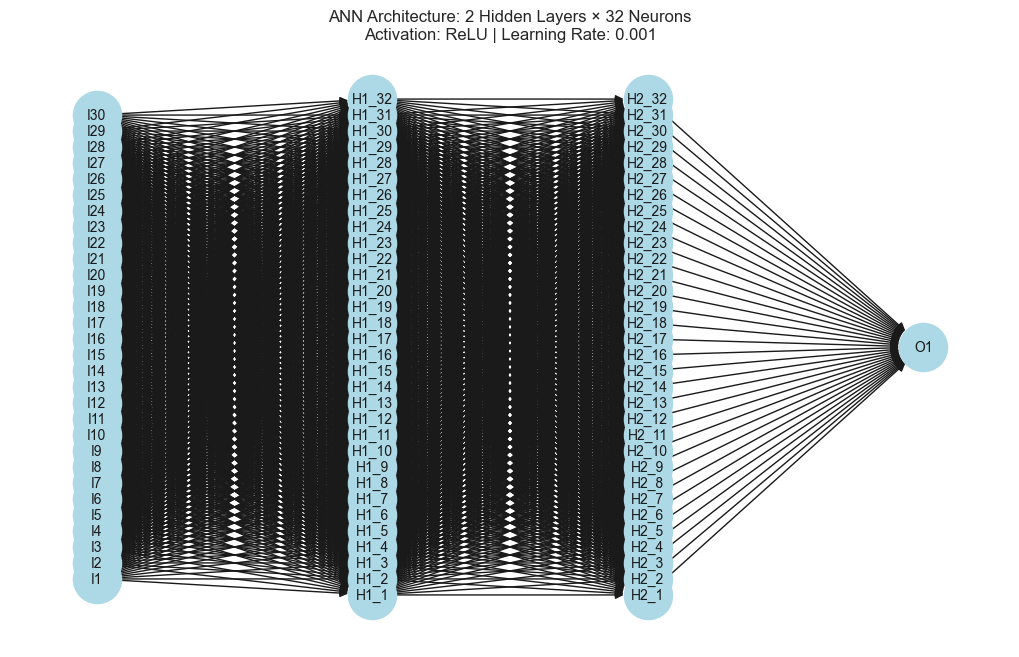

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

def visualize_ann(input_features, num_hidden_layers, neurons_per_layer, output_neurons=1):
    """
    Visualize an Artificial Neural Network (ANN) architecture using NetworkX and Matplotlib.

    Parameters:
        input_features (int): Number of input features (nodes in input layer)
        num_hidden_layers (int): Number of hidden layers
        neurons_per_layer (int): Number of neurons in each hidden layer
        output_neurons (int): Number of output neurons (default is 1 for binary classification)
    """
    G = nx.DiGraph()

    # Add nodes for input layer
    for i in range(input_features):
        G.add_node(f'Input_{i+1}', layer='Input')

    # Add nodes for each hidden layer and neuron
    for layer in range(num_hidden_layers):
        for neuron in range(neurons_per_layer):
            G.add_node(f'Hidden{layer+1}_{neuron+1}', layer=f'Hidden {layer+1}')

    # Add nodes for output layer
    for o in range(output_neurons):
        G.add_node(f'Output_{o+1}', layer='Output')

    # Connect input layer to first hidden layer
    for i in range(input_features):
        for h in range(neurons_per_layer):
            G.add_edge(f'Input_{i+1}', f'Hidden1_{h+1}')

    # Connect hidden layers
    for layer in range(1, num_hidden_layers):
        for h1 in range(neurons_per_layer):
            for h2 in range(neurons_per_layer):
                G.add_edge(f'Hidden{layer}_{h1+1}', f'Hidden{layer+1}_{h2+1}')

    # Connect last hidden layer to output layer
    for h in range(neurons_per_layer):
        for o in range(output_neurons):
            G.add_edge(f'Hidden{num_hidden_layers}_{h+1}', f'Output_{o+1}')

    # Prepare positions for nodes in each layer
    pos = {}
    layer_nodes = {
        'Input': [n for n in G.nodes if n.startswith('Input')],
        'Output': [n for n in G.nodes if n.startswith('Output')],
    }
    for i in range(num_hidden_layers):
        layer_nodes[f'Hidden {i+1}'] = [n for n in G.nodes if f'Hidden{i+1}_' in n]

    # Set x-axis positions for each layer
    layer_x = {'Input': 0, 'Output': num_hidden_layers + 1}
    for i in range(num_hidden_layers):
        layer_x[f'Hidden {i+1}'] = i + 1

    # Assign positions to nodes for plotting
    for layer, nodes in layer_nodes.items():
        x = layer_x.get(layer, 0)
        y_gap = 1.5
        y_offset = -((len(nodes) - 1) / 2) * y_gap
        for i, node in enumerate(nodes):
            pos[node] = (x, y_offset + i * y_gap)

    # Draw the network graph
    plt.figure(figsize=(10, 6))
    nx.draw(G, pos, with_labels=True, node_size=1200, node_color='lightblue', font_size=10, arrowsize=12)
    plt.title(f"ANN Architecture: {num_hidden_layers} Hidden Layers × {neurons_per_layer} Neurons\nActivation: ReLU | Learning Rate: 0.001")
    plt.axis('off')
    plt.show()

# Extract best model configuration from results dataframe
best_model_config = results_dataframe.iloc[0]
input_feature_count = X_train.shape[1]
hidden_layer_count = int(best_model_config['Layers'])
neurons_in_each_layer = int(best_model_config['Neurons'])

# Visualize the ANN architecture using the best hyperparameters
visualize_ann(
    input_features=input_feature_count,
    num_hidden_layers=hidden_layer_count,
    neurons_per_layer=neurons_in_each_layer
)


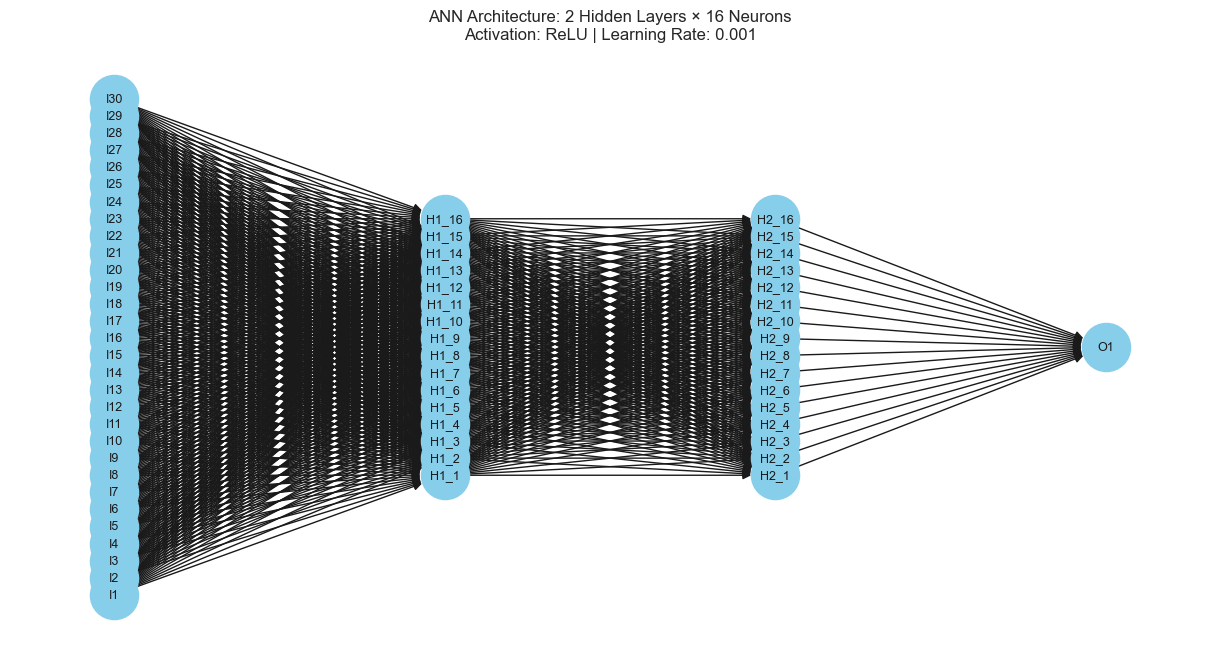

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

def visualize_ann_architecture(num_input_features, num_hidden_layers, neurons_per_layer, num_output_neurons=1):
    """
    Visualizes a feedforward Artificial Neural Network (ANN) architecture.

    Args:
        num_input_features (int): Number of input features (nodes in the input layer)
        num_hidden_layers (int): Number of hidden layers
        neurons_per_layer (int): Number of neurons in each hidden layer
        num_output_neurons (int): Number of output neurons (default is 1 for binary classification)
    """
    ann_graph = nx.DiGraph()

    # Add input layer nodes
    for i in range(num_input_features):
        ann_graph.add_node(f'Input_{i+1}', layer='Input')

    # Add hidden layer nodes
    for layer in range(num_hidden_layers):
        for neuron in range(neurons_per_layer):
            ann_graph.add_node(f'Hidden{layer+1}_{neuron+1}', layer=f'Hidden {layer+1}')

    # Add output layer nodes
    for o in range(num_output_neurons):
        ann_graph.add_node(f'Output_{o+1}', layer='Output')

    # Connect input layer to first hidden layer
    for i in range(num_input_features):
        for h in range(neurons_per_layer):
            ann_graph.add_edge(f'Input_{i+1}', f'Hidden1_{h+1}')

    # Connect hidden layers to each other
    for layer in range(1, num_hidden_layers):
        for h1 in range(neurons_per_layer):
            for h2 in range(neurons_per_layer):
                ann_graph.add_edge(f'Hidden{layer}_{h1+1}', f'Hidden{layer+1}_{h2+1}')

    # Connect last hidden layer to output layer
    for h in range(neurons_per_layer):
        for o in range(num_output_neurons):
            ann_graph.add_edge(f'Hidden{num_hidden_layers}_{h+1}', f'Output_{o+1}')

    # Position nodes for plotting
    node_positions = {}
    layer_nodes = {
        'Input': [n for n in ann_graph.nodes if n.startswith('Input')],
        'Output': [n for n in ann_graph.nodes if n.startswith('Output')],
    }
    for layer in range(num_hidden_layers):
        layer_nodes[f'Hidden {layer+1}'] = [n for n in ann_graph.nodes if f'Hidden{layer+1}_' in n]

    x_coords = {'Input': 0, 'Output': num_hidden_layers + 1}
    for i in range(num_hidden_layers):
        x_coords[f'Hidden {i+1}'] = i + 1

    for layer, nodes in layer_nodes.items():
        x = x_coords[layer]
        y_gap = 1.5
        y_offset = -((len(nodes) - 1) / 2) * y_gap
        for i, node in enumerate(nodes):
            node_positions[node] = (x, y_offset + i * y_gap)

    # Draw the ANN graph
    plt.figure(figsize=(12, 6))
    nx.draw(
        ann_graph, node_positions, with_labels=True, node_size=1200,
        node_color='skyblue', font_size=9, arrowsize=12
    )
    plt.title(f"ANN Architecture: {num_hidden_layers} Hidden Layers × {neurons_per_layer} Neurons\nActivation: ReLU | Learning Rate: 0.001")
    plt.axis('off')
    plt.subplots_adjust(left=0.1, right=0.9, top=0.85, bottom=0.1)
    plt.show()

# Example: Set up values from your chosen/best model configuration
num_input_features = X_train.shape[1]   # Number of input features
num_hidden_layers = 2                   # Example: 2 hidden layers
neurons_per_layer = 16                  # Example: 16 neurons per hidden layer

# Visualize the ANN architecture
visualize_ann_architecture(num_input_features, num_hidden_layers, neurons_per_layer)



visual representation of neural network’s structure—showing the number of layers, neurons per layer, and how they connect—making it easy to understand and explain model.
Nodes represent neurons in each layer:

Input layer (labeled "Input_1", "Input_2", etc.) on the left.

Hidden layers (labeled "Hidden1_1", "Hidden2_1", etc.) in the middle, with each layer stacked vertically.

Output layer (labeled "Output_1") on the right.